In [1]:
#Mounting Google Drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Changing the current working directory to the Google Drive
%cd /content/drive/My Drive/MLDL2024_project1-Enrico

/content/drive/My Drive/MLDL2024_project1-Enrico


In [3]:
!pip install -U fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=5d65b4404df3422542a3512232ba51ec4551cc2627b47c12f71f75378bc729ba
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=d0d27840b04275b25d30d7c30d57179c76c06f4e693debd7c07e96860a50c024
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath


In [4]:
#Importing the necessary libraries
import os
import torch
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from datasets.gta5 import GTA5Custom
from datasets.cityscapes import CityscapesCustom
from models.bisenet.build_bisenet import BiSeNet
from train import train_model
from utils import test_latency_FPS, test_FLOPs_params, plot_miou_over_epochs

In [5]:
#Set device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

#Set the manual seeds
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

#Set training parameters
gta5_height, gta5_width = (720, 1280)
gta5_batch_size = 8

cityscapes_height, cityscapes_width = (512, 1024)
cityscapes_batch_size = 8

n_epochs = 50

Using device: cuda


In [6]:
#Create Dataloaders for Cityscapes and GTA5
gta5_dir = os.path.dirname(os.getcwd()) + '/GTA5/GTA5/'
cityscapes_dir = os.path.dirname(os.getcwd()) + '/Cityscapes/Cityspaces/'

gta5_train_dataset = GTA5Custom(gta5_dir, gta5_height, gta5_width, augment=None)
cityscapes_test_dataset = CityscapesCustom(cityscapes_dir, 'val', cityscapes_height, cityscapes_width)

gta5_train_dataloader = DataLoader(gta5_train_dataset, gta5_batch_size, shuffle=True, num_workers=4)
cityscapes_test_dataloader = DataLoader(cityscapes_test_dataset, cityscapes_batch_size, shuffle=False, num_workers=4)

#Get the class names
class_names = cityscapes_test_dataset.get_class_names()

print(f'GTA5 (Train): {len(gta5_train_dataset)} images, divided into {len(gta5_train_dataloader)} batches of size {gta5_train_dataloader.batch_size}')
print(f'Cityscapes (Test): {len(cityscapes_test_dataset)} images, divided into {len(cityscapes_test_dataloader)} batches of size {cityscapes_test_dataloader.batch_size}')

GTA5 (Train): 2500 images, divided into 313 batches of size 8
Cityscapes (Test): 500 images, divided into 63 batches of size 8


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 213MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 223MB/s]



Epoch 1/50  40s]: Train mIoU=30.03%, Test mIoU=13.51%
road: 23.81% sidewalk: 3.27% building: 54.64% wall: 0.14% fence: 5.43% pole: 6.30% traffic light: 0.06% traffic sign: 0.00% vegetation: 67.56% terrain: 4.12% sky: 68.49% person: 0.67% rider: 0.00% car: 19.28% truck: 2.18% bus: 0.00% train: 0.77% motorcycle: 0.00% bicycle: 0.00% 


Epoch 2/50  29s]: Train mIoU=43.01%, Test mIoU=15.93%
road: 30.13% sidewalk: 7.08% building: 62.05% wall: 1.10% fence: 1.90% pole: 11.36% traffic light: 4.26% traffic sign: 0.70% vegetation: 64.46% terrain: 9.32% sky: 59.35% person: 26.30% rider: 0.00% car: 22.55% truck: 1.74% bus: 0.00% train: 0.30% motorcycle: 0.00% bicycle: 0.00% 


Epoch 3/50  19s]: Train mIoU=50.86%, Test mIoU=17.90%
road: 31.16% sidewalk: 5.77% building: 64.57% wall: 4.33% fence: 4.64% pole: 11.39% traffic light: 9.13% traffic sign: 3.49% vegetation: 67.00% terrain: 9.50% sky: 62.04% person: 32.06% rider: 3.66% car: 29.44% truck: 1.63% bus: 0.08% train: 0.20% motorcycle: 0.00% bicycle: 0.00% 


Epoch 4/50  18s]: Train mIoU=57.17%, Test mIoU=16.86%
road: 13.46% sidewalk: 8.38% building: 46.20% wall: 6.74% fence: 6.54% pole: 14.23% traffic light: 8.10% traffic sign: 4.07% vegetation: 71.46% terrain: 9.49% sky: 61.70% person: 31.97% rider: 3.50% car: 27.44% truck: 3.17% bus: 0.39% train: 0.00% motorcycle: 3.54% bicycle: 0.00% 


Epoch 5/50  30s]: Train mIoU=60.98%, Test mIoU=17.34%
road: 11.81% sidewalk: 3.39% building: 40.49% wall: 5.93% fence: 5.98% pole: 11.27% traffic light: 6.84% traffic sign: 3.44% vegetation: 68.53% terrain: 4.51% sky: 64.39% person: 33.02% rider: 5.82% car: 55.64% truck: 3.18% bus: 0.19% train: 0.00% motorcycle: 5.05% bicycle: 0.00% 


Epoch 6/50  19s]: Train mIoU=63.72%, Test mIoU=17.71%
road: 23.11% sidewalk: 3.34% building: 55.77% wall: 4.17% fence: 2.92% pole: 8.69% traffic light: 10.79% traffic sign: 7.44% vegetation: 70.52% terrain: 4.19% sky: 59.50% person: 34.88% rider: 6.59% car: 38.03% truck: 3.41% bus: 1.17% train: 0.00% motorcycle: 2.03% bicycle: 0.00% 


Epoch 7/50  19s]: Train mIoU=65.74%, Test mIoU=18.65%
road: 27.27% sidewalk: 1.68% building: 54.77% wall: 3.29% fence: 3.07% pole: 11.21% traffic light: 12.25% traffic sign: 7.34% vegetation: 64.12% terrain: 3.47% sky: 61.28% person: 36.28% rider: 8.05% car: 50.71% truck: 3.42% bus: 0.81% train: 0.00% motorcycle: 5.32% bicycle: 0.00% 


Epoch 8/50  30s]: Train mIoU=67.15%, Test mIoU=19.63%
road: 30.18% sidewalk: 4.26% building: 60.38% wall: 5.43% fence: 6.28% pole: 11.92% traffic light: 11.73% traffic sign: 5.41% vegetation: 68.74% terrain: 3.89% sky: 63.69% person: 37.35% rider: 8.02% car: 49.50% truck: 2.16% bus: 0.36% train: 0.00% motorcycle: 3.73% bicycle: 0.00% 


Epoch 9/50  19s]: Train mIoU=68.46%, Test mIoU=19.48%
road: 32.98% sidewalk: 2.48% building: 58.39% wall: 3.57% fence: 8.65% pole: 11.71% traffic light: 11.94% traffic sign: 7.62% vegetation: 65.05% terrain: 3.36% sky: 61.48% person: 32.92% rider: 7.80% car: 52.74% truck: 3.36% bus: 1.63% train: 0.00% motorcycle: 4.44% bicycle: 0.00% 


Epoch 10/50  26s]: Train mIoU=69.32%, Test mIoU=19.28%
road: 30.50% sidewalk: 4.21% building: 61.14% wall: 5.81% fence: 2.34% pole: 15.27% traffic light: 13.24% traffic sign: 7.24% vegetation: 66.19% terrain: 3.18% sky: 58.31% person: 38.82% rider: 7.36% car: 47.89% truck: 1.52% bus: 0.30% train: 0.00% motorcycle: 3.09% bicycle: 0.00% 


Epoch 11/50  30s]: Train mIoU=70.46%, Test mIoU=19.91%
road: 26.77% sidewalk: 3.35% building: 61.11% wall: 4.86% fence: 6.30% pole: 15.94% traffic light: 12.55% traffic sign: 6.07% vegetation: 68.29% terrain: 2.96% sky: 61.67% person: 38.18% rider: 8.63% car: 51.63% truck: 4.58% bus: 1.06% train: 0.20% motorcycle: 4.06% bicycle: 0.00% 


Epoch 12/50  20s]: Train mIoU=71.51%, Test mIoU=22.65%
road: 54.39% sidewalk: 3.69% building: 62.17% wall: 7.03% fence: 10.75% pole: 15.29% traffic light: 14.20% traffic sign: 8.06% vegetation: 68.67% terrain: 5.10% sky: 66.10% person: 40.46% rider: 7.67% car: 57.72% truck: 3.04% bus: 1.69% train: 0.00% motorcycle: 4.40% bicycle: 0.00% 


Epoch 13/50  18s]: Train mIoU=72.26%, Test mIoU=19.08%
road: 35.31% sidewalk: 4.67% building: 55.36% wall: 3.33% fence: 2.99% pole: 13.20% traffic light: 11.60% traffic sign: 4.92% vegetation: 70.99% terrain: 4.68% sky: 56.38% person: 37.94% rider: 5.96% car: 48.98% truck: 2.60% bus: 0.81% train: 0.00% motorcycle: 2.76% bicycle: 0.00% 


Epoch 14/50  30s]: Train mIoU=73.29%, Test mIoU=20.29%
road: 32.44% sidewalk: 5.51% building: 63.99% wall: 5.36% fence: 6.90% pole: 16.24% traffic light: 13.02% traffic sign: 6.80% vegetation: 67.56% terrain: 3.66% sky: 64.02% person: 37.40% rider: 3.50% car: 53.52% truck: 1.54% bus: 0.75% train: 0.00% motorcycle: 3.28% bicycle: 0.00% 


Epoch 15/50  19s]: Train mIoU=73.93%, Test mIoU=19.88%
road: 35.91% sidewalk: 8.01% building: 56.92% wall: 4.64% fence: 6.03% pole: 17.61% traffic light: 13.69% traffic sign: 4.92% vegetation: 66.49% terrain: 4.09% sky: 60.88% person: 34.32% rider: 7.39% car: 50.69% truck: 3.18% bus: 0.59% train: 0.00% motorcycle: 2.35% bicycle: 0.07% 


Epoch 16/50  27s]: Train mIoU=74.61%, Test mIoU=20.59%
road: 36.62% sidewalk: 7.16% building: 59.60% wall: 5.45% fence: 2.85% pole: 15.84% traffic light: 12.46% traffic sign: 4.97% vegetation: 71.25% terrain: 4.25% sky: 64.18% person: 36.42% rider: 7.39% car: 55.47% truck: 2.72% bus: 1.09% train: 0.00% motorcycle: 3.51% bicycle: 0.02% 


Epoch 17/50  30s]: Train mIoU=74.79%, Test mIoU=20.06%
road: 36.44% sidewalk: 6.95% building: 61.43% wall: 4.73% fence: 2.76% pole: 16.26% traffic light: 10.33% traffic sign: 4.11% vegetation: 72.03% terrain: 3.48% sky: 63.95% person: 33.38% rider: 5.44% car: 51.69% truck: 5.63% bus: 1.02% train: 0.00% motorcycle: 1.57% bicycle: 0.03% 


Epoch 18/50  20s]: Train mIoU=75.39%, Test mIoU=20.37%
road: 36.78% sidewalk: 10.04% building: 56.92% wall: 3.30% fence: 6.05% pole: 17.08% traffic light: 10.77% traffic sign: 4.89% vegetation: 74.91% terrain: 4.77% sky: 66.42% person: 33.74% rider: 5.48% car: 47.68% truck: 4.14% bus: 1.19% train: 0.00% motorcycle: 2.78% bicycle: 0.02% 


Epoch 19/50  18s]: Train mIoU=76.17%, Test mIoU=19.34%
road: 38.72% sidewalk: 6.46% building: 48.61% wall: 2.58% fence: 2.78% pole: 14.63% traffic light: 9.00% traffic sign: 4.54% vegetation: 73.30% terrain: 5.86% sky: 63.77% person: 33.09% rider: 3.90% car: 51.52% truck: 5.69% bus: 0.62% train: 0.00% motorcycle: 2.43% bicycle: 0.00% 


Epoch 20/50  30s]: Train mIoU=76.69%, Test mIoU=21.85%
road: 49.18% sidewalk: 7.66% building: 61.39% wall: 5.29% fence: 4.53% pole: 16.67% traffic light: 11.65% traffic sign: 6.44% vegetation: 72.97% terrain: 4.54% sky: 64.24% person: 38.62% rider: 6.11% car: 58.14% truck: 4.34% bus: 2.09% train: 0.00% motorcycle: 1.13% bicycle: 0.11% 


Epoch 21/50  19s]: Train mIoU=76.81%, Test mIoU=20.13%
road: 35.00% sidewalk: 6.19% building: 58.33% wall: 4.13% fence: 6.68% pole: 16.50% traffic light: 9.09% traffic sign: 5.45% vegetation: 65.45% terrain: 3.18% sky: 65.01% person: 36.32% rider: 6.16% car: 57.79% truck: 4.54% bus: 1.23% train: 0.02% motorcycle: 1.43% bicycle: 0.02% 


Epoch 22/50  18s]: Train mIoU=77.15%, Test mIoU=21.84%
road: 50.44% sidewalk: 4.19% building: 60.65% wall: 4.82% fence: 13.19% pole: 14.03% traffic light: 10.95% traffic sign: 5.92% vegetation: 71.06% terrain: 4.74% sky: 66.30% person: 37.84% rider: 4.33% car: 60.20% truck: 3.45% bus: 0.64% train: 0.07% motorcycle: 1.96% bicycle: 0.17% 


Epoch 23/50  30s]: Train mIoU=77.31%, Test mIoU=21.36%
road: 45.35% sidewalk: 6.16% building: 63.88% wall: 6.56% fence: 8.23% pole: 17.13% traffic light: 12.39% traffic sign: 6.04% vegetation: 69.66% terrain: 3.67% sky: 66.06% person: 38.24% rider: 2.42% car: 54.13% truck: 3.78% bus: 0.46% train: 0.02% motorcycle: 1.55% bicycle: 0.04% 


Epoch 24/50  20s]: Train mIoU=77.79%, Test mIoU=20.35%
road: 37.73% sidewalk: 6.98% building: 57.10% wall: 3.63% fence: 7.05% pole: 18.35% traffic light: 11.71% traffic sign: 8.03% vegetation: 68.20% terrain: 3.80% sky: 62.42% person: 36.92% rider: 3.92% car: 53.64% truck: 4.20% bus: 0.60% train: 0.00% motorcycle: 2.33% bicycle: 0.07% 


Epoch 25/50  18s]: Train mIoU=77.97%, Test mIoU=21.90%
road: 49.94% sidewalk: 6.21% building: 57.28% wall: 4.61% fence: 6.14% pole: 18.50% traffic light: 14.74% traffic sign: 6.30% vegetation: 73.27% terrain: 4.96% sky: 65.32% person: 38.25% rider: 4.05% car: 59.19% truck: 4.77% bus: 0.86% train: 0.00% motorcycle: 1.72% bicycle: 0.06% 


Epoch 26/50  30s]: Train mIoU=78.14%, Test mIoU=20.96%
road: 36.88% sidewalk: 11.13% building: 59.58% wall: 3.89% fence: 4.83% pole: 17.76% traffic light: 12.54% traffic sign: 7.30% vegetation: 72.44% terrain: 4.52% sky: 62.59% person: 39.50% rider: 5.07% car: 53.61% truck: 2.71% bus: 1.46% train: 0.00% motorcycle: 2.29% bicycle: 0.11% 


Epoch 27/50  20s]: Train mIoU=78.36%, Test mIoU=21.95%
road: 47.04% sidewalk: 8.52% building: 62.98% wall: 5.77% fence: 8.81% pole: 17.31% traffic light: 12.06% traffic sign: 6.84% vegetation: 73.42% terrain: 4.48% sky: 62.45% person: 39.65% rider: 2.80% car: 58.45% truck: 3.70% bus: 0.28% train: 0.35% motorcycle: 2.08% bicycle: 0.12% 


Epoch 28/50  19s]: Train mIoU=78.66%, Test mIoU=20.80%
road: 32.99% sidewalk: 9.70% building: 63.90% wall: 3.24% fence: 5.35% pole: 18.91% traffic light: 13.15% traffic sign: 7.46% vegetation: 72.82% terrain: 3.67% sky: 64.30% person: 39.25% rider: 4.64% car: 50.48% truck: 2.99% bus: 0.30% train: 0.00% motorcycle: 2.00% bicycle: 0.08% 


Epoch 29/50  31s]: Train mIoU=78.84%, Test mIoU=21.95%
road: 39.06% sidewalk: 7.41% building: 67.20% wall: 6.22% fence: 11.63% pole: 17.44% traffic light: 11.48% traffic sign: 6.33% vegetation: 68.80% terrain: 3.14% sky: 68.13% person: 40.91% rider: 6.38% car: 57.28% truck: 2.95% bus: 0.03% train: 0.00% motorcycle: 2.54% bicycle: 0.02% 


Epoch 30/50  20s]: Train mIoU=79.09%, Test mIoU=22.30%
road: 42.72% sidewalk: 12.44% building: 65.67% wall: 4.20% fence: 6.48% pole: 19.22% traffic light: 12.07% traffic sign: 6.51% vegetation: 72.41% terrain: 4.09% sky: 67.58% person: 40.19% rider: 4.98% car: 56.93% truck: 3.02% bus: 2.35% train: 0.04% motorcycle: 2.66% bicycle: 0.05% 


Epoch 31/50  18s]: Train mIoU=79.31%, Test mIoU=20.53%
road: 37.76% sidewalk: 7.64% building: 61.74% wall: 6.27% fence: 7.30% pole: 16.87% traffic light: 11.40% traffic sign: 6.09% vegetation: 68.63% terrain: 3.42% sky: 65.32% person: 37.88% rider: 2.02% car: 51.85% truck: 3.40% bus: 0.67% train: 0.00% motorcycle: 1.71% bicycle: 0.01% 


Epoch 32/50  31s]: Train mIoU=79.34%, Test mIoU=21.26%
road: 37.22% sidewalk: 7.09% building: 65.30% wall: 6.48% fence: 3.71% pole: 17.92% traffic light: 10.56% traffic sign: 6.23% vegetation: 69.77% terrain: 3.14% sky: 65.96% person: 40.57% rider: 4.81% car: 56.62% truck: 3.15% bus: 1.16% train: 1.99% motorcycle: 2.27% bicycle: 0.01% 


Epoch 33/50  19s]: Train mIoU=79.43%, Test mIoU=20.62%
road: 35.93% sidewalk: 8.45% building: 63.18% wall: 4.84% fence: 6.36% pole: 16.59% traffic light: 13.20% traffic sign: 6.64% vegetation: 65.18% terrain: 3.14% sky: 64.04% person: 34.38% rider: 5.96% car: 57.18% truck: 3.83% bus: 0.50% train: 0.00% motorcycle: 2.39% bicycle: 0.03% 


Epoch 34/50  18s]: Train mIoU=79.43%, Test mIoU=21.60%
road: 44.24% sidewalk: 8.81% building: 63.30% wall: 5.23% fence: 4.03% pole: 16.33% traffic light: 10.91% traffic sign: 6.96% vegetation: 70.18% terrain: 3.95% sky: 66.79% person: 40.07% rider: 3.46% car: 58.91% truck: 3.72% bus: 0.91% train: 0.14% motorcycle: 2.39% bicycle: 0.06% 


Epoch 35/50  31s]: Train mIoU=79.70%, Test mIoU=21.09%
road: 33.85% sidewalk: 6.40% building: 65.38% wall: 6.08% fence: 10.13% pole: 18.24% traffic light: 11.02% traffic sign: 6.86% vegetation: 69.11% terrain: 3.04% sky: 65.21% person: 41.01% rider: 4.83% car: 52.47% truck: 4.16% bus: 0.77% train: 0.01% motorcycle: 2.09% bicycle: 0.11% 


Epoch 36/50  20s]: Train mIoU=80.05%, Test mIoU=21.53%
road: 39.97% sidewalk: 12.97% building: 57.98% wall: 4.14% fence: 5.36% pole: 18.41% traffic light: 11.80% traffic sign: 7.26% vegetation: 74.69% terrain: 4.35% sky: 61.33% person: 38.90% rider: 4.38% car: 58.58% truck: 5.02% bus: 1.07% train: 0.02% motorcycle: 2.81% bicycle: 0.04% 


Epoch 37/50  18s]: Train mIoU=80.21%, Test mIoU=21.33%
road: 39.42% sidewalk: 7.86% building: 64.35% wall: 5.52% fence: 6.38% pole: 16.46% traffic light: 9.65% traffic sign: 5.45% vegetation: 73.02% terrain: 3.40% sky: 64.09% person: 40.76% rider: 3.39% car: 59.65% truck: 3.51% bus: 0.17% train: 0.11% motorcycle: 1.89% bicycle: 0.13% 


Epoch 38/50  32s]: Train mIoU=80.41%, Test mIoU=21.15%
road: 40.28% sidewalk: 9.46% building: 59.43% wall: 4.56% fence: 6.44% pole: 17.10% traffic light: 9.62% traffic sign: 6.59% vegetation: 72.33% terrain: 3.80% sky: 63.75% person: 36.12% rider: 2.67% car: 60.34% truck: 5.03% bus: 2.18% train: 0.01% motorcycle: 2.08% bicycle: 0.01% 


Epoch 39/50  19s]: Train mIoU=80.51%, Test mIoU=22.65%
road: 49.52% sidewalk: 8.21% building: 62.42% wall: 6.58% fence: 9.91% pole: 19.32% traffic light: 14.22% traffic sign: 7.29% vegetation: 72.80% terrain: 4.40% sky: 63.55% person: 40.97% rider: 3.54% car: 58.54% truck: 5.11% bus: 0.56% train: 0.00% motorcycle: 3.23% bicycle: 0.29% 


Epoch 40/50  20s]: Train mIoU=80.55%, Test mIoU=21.12%
road: 36.37% sidewalk: 9.07% building: 62.30% wall: 5.16% fence: 8.51% pole: 16.87% traffic light: 10.02% traffic sign: 4.83% vegetation: 74.24% terrain: 3.38% sky: 63.64% person: 40.56% rider: 4.29% car: 54.27% truck: 4.39% bus: 0.47% train: 0.09% motorcycle: 2.73% bicycle: 0.06% 


Epoch 41/50  31s]: Train mIoU=80.71%, Test mIoU=21.46%
road: 38.10% sidewalk: 9.99% building: 65.16% wall: 7.82% fence: 10.91% pole: 16.15% traffic light: 12.83% traffic sign: 5.78% vegetation: 71.55% terrain: 3.31% sky: 62.32% person: 38.34% rider: 3.89% car: 53.56% truck: 4.65% bus: 0.57% train: 0.00% motorcycle: 2.66% bicycle: 0.16% 


Epoch 42/50  20s]: Train mIoU=80.78%, Test mIoU=21.72%
road: 41.76% sidewalk: 13.40% building: 64.62% wall: 5.20% fence: 7.85% pole: 16.92% traffic light: 13.88% traffic sign: 6.10% vegetation: 72.75% terrain: 4.06% sky: 63.44% person: 38.78% rider: 2.27% car: 53.05% truck: 4.05% bus: 1.78% train: 0.42% motorcycle: 2.37% bicycle: 0.05% 


Epoch 43/50  19s]: Train mIoU=81.03%, Test mIoU=20.92%
road: 39.38% sidewalk: 9.25% building: 59.95% wall: 5.39% fence: 4.87% pole: 16.42% traffic light: 12.96% traffic sign: 6.47% vegetation: 73.09% terrain: 3.98% sky: 61.55% person: 37.59% rider: 2.94% car: 57.62% truck: 3.62% bus: 0.98% train: 0.00% motorcycle: 1.34% bicycle: 0.09% 


Epoch 44/50  31s]: Train mIoU=81.04%, Test mIoU=22.34%
road: 44.03% sidewalk: 7.10% building: 63.56% wall: 5.77% fence: 10.64% pole: 20.34% traffic light: 11.30% traffic sign: 7.55% vegetation: 75.33% terrain: 3.98% sky: 65.15% person: 40.78% rider: 4.01% car: 56.40% truck: 3.90% bus: 1.04% train: 0.01% motorcycle: 3.39% bicycle: 0.17% 


Epoch 45/50  20s]: Train mIoU=80.92%, Test mIoU=21.15%
road: 36.29% sidewalk: 12.11% building: 58.91% wall: 5.90% fence: 7.53% pole: 19.01% traffic light: 11.35% traffic sign: 5.80% vegetation: 74.36% terrain: 3.72% sky: 57.59% person: 38.78% rider: 5.00% car: 54.24% truck: 6.02% bus: 0.92% train: 0.00% motorcycle: 3.90% bicycle: 0.39% 


Epoch 46/50  19s]: Train mIoU=81.32%, Test mIoU=21.48%
road: 43.42% sidewalk: 7.24% building: 62.43% wall: 5.32% fence: 9.68% pole: 17.70% traffic light: 11.60% traffic sign: 5.74% vegetation: 73.49% terrain: 4.14% sky: 65.69% person: 39.20% rider: 1.74% car: 52.84% truck: 4.35% bus: 0.58% train: 0.00% motorcycle: 2.62% bicycle: 0.34% 


Epoch 47/50  30s]: Train mIoU=81.43%, Test mIoU=22.56%
road: 41.45% sidewalk: 8.75% building: 64.62% wall: 5.73% fence: 11.28% pole: 20.63% traffic light: 11.02% traffic sign: 8.17% vegetation: 73.80% terrain: 3.83% sky: 67.40% person: 41.61% rider: 3.73% car: 54.82% truck: 4.53% bus: 3.74% train: 0.05% motorcycle: 2.85% bicycle: 0.66% 


Epoch 48/50  19s]: Train mIoU=81.49%, Test mIoU=21.50%
road: 36.87% sidewalk: 8.07% building: 67.51% wall: 7.33% fence: 7.14% pole: 19.15% traffic light: 12.08% traffic sign: 5.61% vegetation: 72.36% terrain: 3.49% sky: 66.16% person: 40.25% rider: 2.07% car: 55.25% truck: 2.41% bus: 0.09% train: 0.00% motorcycle: 2.35% bicycle: 0.40% 


Epoch 49/50  18s]: Train mIoU=81.59%, Test mIoU=21.42%
road: 36.53% sidewalk: 10.08% building: 67.29% wall: 6.68% fence: 5.22% pole: 18.74% traffic light: 11.71% traffic sign: 5.82% vegetation: 74.09% terrain: 3.22% sky: 64.28% person: 39.61% rider: 3.70% car: 53.71% truck: 3.40% bus: 0.56% train: 0.00% motorcycle: 2.27% bicycle: 0.02% 


Epoch 50/50  30s]: Train mIoU=81.54%, Test mIoU=22.35%
road: 47.09% sidewalk: 11.88% building: 67.71% wall: 8.99% fence: 6.32% pole: 18.37% traffic light: 11.72% traffic sign: 7.33% vegetation: 72.44% terrain: 4.75% sky: 64.57% person: 41.02% rider: 2.16% car: 54.81% truck: 2.12% bus: 0.68% train: 0.01% motorcycle: 2.49% bicycle: 0.11% 
Best mIoU=22.65% at epoch 12
road: 54.39% sidewalk: 3.69% building: 62.17% wall: 7.03% fence: 10.75% pole: 15.29% traffic light: 14.20% traffic sign: 8.06% vegetation: 68.67% terrain: 5.10% sky: 66.10% person: 40.46% rider: 7.67% car: 57.72% truck: 3.04% bus: 1.69% train: 0.00% motorcycle: 4.40% bicycle: 0.00% 

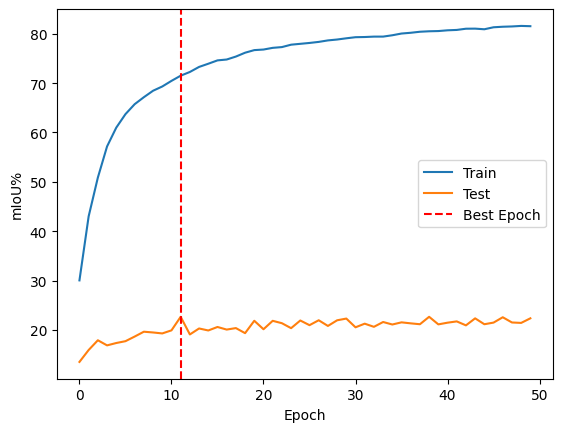

In [7]:
#Testing Domain Shift problem in semantic segmentation

#Set up the model with the pretrained weights
BiSeNet_model = BiSeNet(num_classes=19, context_path='resnet18').to(device)

#Set up the loss function and the optimizer for BiSeNet
BiSeNet_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
BiSeNet_optimizer = torch.optim.SGD(BiSeNet_model.parameters(), lr=2.5e-2, momentum=0.9, weight_decay=1e-4)

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(BiSeNet_model, BiSeNet_criterion, BiSeNet_optimizer,
            gta5_train_dataloader, cityscapes_test_dataloader, class_names, device, n_epochs, model_name='BiSeNet_shift')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch, model_name='BiSeNet_shift')

In [8]:
#Create Dataloaders for GTA5 with Data Augmentation
augment1 = transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.3)
augment2 = transforms.GaussianBlur(kernel_size=3)

gta5_train_dataset_aug1 = GTA5Custom(gta5_dir, gta5_height, gta5_width, augment1)
gta5_train_dataset_aug2 = GTA5Custom(gta5_dir, gta5_height, gta5_width, augment2)

gta5_train_dataloader_aug1 = DataLoader(gta5_train_dataset_aug1, gta5_batch_size, shuffle=True, num_workers=4)
gta5_train_dataloader_aug2 = DataLoader(gta5_train_dataset_aug2, gta5_batch_size, shuffle=True, num_workers=4)

print(f'GTA5 augmented1 (Train): {len(gta5_train_dataset_aug1)} images, divided into {len(gta5_train_dataloader_aug1)} batches of size {gta5_train_dataloader_aug1.batch_size}')
print(f'GTA5 augmented2 (Train): {len(gta5_train_dataset_aug2)} images, divided into {len(gta5_train_dataloader_aug2)} batches of size {gta5_train_dataloader_aug2.batch_size}')
print(f'As we can see, the number of images is the same as original GTA5, because augmentation is done at training time')

GTA5 augmented1 (Train): 2500 images, divided into 313 batches of size 8
GTA5 augmented2 (Train): 2500 images, divided into 313 batches of size 8
As we can see, the number of images is the same as original GTA5, because augmentation is done at training time



Epoch 1/50  40s]: Train mIoU=27.60%, Test mIoU=16.03%
road: 41.75% sidewalk: 5.22% building: 56.97% wall: 3.06% fence: 3.75% pole: 9.71% traffic light: 0.00% traffic sign: 0.04% vegetation: 59.96% terrain: 9.21% sky: 74.67% person: 0.00% rider: 0.00% car: 31.07% truck: 7.13% bus: 1.50% train: 0.52% motorcycle: 0.00% bicycle: 0.00% 


Epoch 2/50  20s]: Train mIoU=41.08%, Test mIoU=23.99%
road: 79.46% sidewalk: 22.27% building: 72.38% wall: 13.20% fence: 15.20% pole: 9.53% traffic light: 0.00% traffic sign: 0.08% vegetation: 72.38% terrain: 18.89% sky: 80.71% person: 8.57% rider: 0.50% car: 52.80% truck: 9.75% bus: 0.04% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 


Epoch 3/50  19s]: Train mIoU=48.15%, Test mIoU=24.12%
road: 68.12% sidewalk: 24.03% building: 71.23% wall: 12.68% fence: 4.48% pole: 14.29% traffic light: 2.25% traffic sign: 0.35% vegetation: 69.99% terrain: 13.25% sky: 80.60% person: 33.30% rider: 2.89% car: 42.45% truck: 14.04% bus: 3.02% train: 1.24% motorcycle: 0.00% bicycle: 0.00% 


Epoch 4/50  20s]: Train mIoU=54.11%, Test mIoU=24.40%
road: 63.43% sidewalk: 29.45% building: 65.57% wall: 8.17% fence: 3.82% pole: 11.83% traffic light: 6.23% traffic sign: 3.08% vegetation: 68.91% terrain: 13.63% sky: 79.75% person: 32.94% rider: 7.98% car: 44.53% truck: 9.86% bus: 6.93% train: 7.01% motorcycle: 0.55% bicycle: 0.00% 


Epoch 5/50  21s]: Train mIoU=58.57%, Test mIoU=27.70%
road: 64.67% sidewalk: 25.40% building: 72.09% wall: 12.40% fence: 17.41% pole: 16.69% traffic light: 12.64% traffic sign: 10.65% vegetation: 75.35% terrain: 17.43% sky: 78.54% person: 38.50% rider: 7.16% car: 40.41% truck: 14.83% bus: 4.86% train: 11.71% motorcycle: 5.51% bicycle: 0.00% 


Epoch 6/50  21s]: Train mIoU=61.41%, Test mIoU=28.73%
road: 72.22% sidewalk: 30.18% building: 70.84% wall: 14.25% fence: 17.74% pole: 19.26% traffic light: 13.11% traffic sign: 7.20% vegetation: 77.13% terrain: 16.66% sky: 79.36% person: 40.32% rider: 8.93% car: 53.26% truck: 11.99% bus: 7.86% train: 3.69% motorcycle: 1.84% bicycle: 0.00% 


Epoch 7/50  24s]: Train mIoU=63.55%, Test mIoU=27.26%
road: 74.38% sidewalk: 19.46% building: 67.90% wall: 12.39% fence: 19.45% pole: 16.50% traffic light: 7.13% traffic sign: 7.27% vegetation: 63.77% terrain: 9.80% sky: 77.06% person: 38.05% rider: 4.72% car: 57.87% truck: 21.30% bus: 8.79% train: 10.87% motorcycle: 1.30% bicycle: 0.00% 


Epoch 8/50  21s]: Train mIoU=64.37%, Test mIoU=28.07%
road: 74.98% sidewalk: 29.25% building: 71.82% wall: 19.56% fence: 10.26% pole: 15.74% traffic light: 13.55% traffic sign: 6.06% vegetation: 74.12% terrain: 13.40% sky: 77.64% person: 39.72% rider: 7.08% car: 58.00% truck: 10.95% bus: 1.48% train: 5.93% motorcycle: 3.72% bicycle: 0.00% 


Epoch 9/50  20s]: Train mIoU=65.16%, Test mIoU=29.60%
road: 77.38% sidewalk: 34.79% building: 71.66% wall: 16.33% fence: 16.61% pole: 19.79% traffic light: 14.65% traffic sign: 8.23% vegetation: 70.98% terrain: 10.91% sky: 78.50% person: 41.51% rider: 4.15% car: 64.07% truck: 16.96% bus: 8.93% train: 3.64% motorcycle: 3.28% bicycle: 0.00% 


Epoch 10/50  20s]: Train mIoU=66.72%, Test mIoU=26.60%
road: 69.92% sidewalk: 27.20% building: 64.81% wall: 13.97% fence: 8.69% pole: 17.75% traffic light: 11.74% traffic sign: 6.95% vegetation: 70.49% terrain: 13.61% sky: 77.34% person: 41.16% rider: 1.97% car: 56.29% truck: 13.06% bus: 6.90% train: 0.00% motorcycle: 3.52% bicycle: 0.00% 


Epoch 11/50  20s]: Train mIoU=67.60%, Test mIoU=29.01%
road: 72.01% sidewalk: 25.12% building: 69.57% wall: 14.65% fence: 18.73% pole: 20.01% traffic light: 16.81% traffic sign: 10.82% vegetation: 75.02% terrain: 15.95% sky: 79.92% person: 42.56% rider: 3.15% car: 61.03% truck: 12.67% bus: 8.94% train: 0.68% motorcycle: 3.61% bicycle: 0.00% 


Epoch 12/50  20s]: Train mIoU=68.48%, Test mIoU=29.07%
road: 73.56% sidewalk: 29.20% building: 70.65% wall: 11.32% fence: 15.85% pole: 22.05% traffic light: 13.71% traffic sign: 8.03% vegetation: 76.73% terrain: 15.66% sky: 79.66% person: 41.89% rider: 2.79% car: 59.97% truck: 9.90% bus: 6.32% train: 11.04% motorcycle: 3.93% bicycle: 0.02% 


Epoch 13/50  20s]: Train mIoU=69.27%, Test mIoU=29.36%
road: 72.18% sidewalk: 27.92% building: 68.57% wall: 16.46% fence: 19.35% pole: 22.22% traffic light: 15.86% traffic sign: 11.15% vegetation: 75.24% terrain: 13.29% sky: 79.43% person: 43.04% rider: 3.31% car: 59.00% truck: 13.46% bus: 8.74% train: 4.47% motorcycle: 4.14% bicycle: 0.05% 


Epoch 14/50  19s]: Train mIoU=70.38%, Test mIoU=26.71%
road: 61.82% sidewalk: 29.11% building: 63.62% wall: 16.17% fence: 16.22% pole: 18.97% traffic light: 13.26% traffic sign: 9.01% vegetation: 74.69% terrain: 14.44% sky: 80.11% person: 41.25% rider: 4.00% car: 44.64% truck: 12.06% bus: 5.43% train: 0.01% motorcycle: 2.67% bicycle: 0.07% 


Epoch 15/50  22s]: Train mIoU=70.88%, Test mIoU=29.67%
road: 73.39% sidewalk: 28.92% building: 72.73% wall: 12.06% fence: 18.05% pole: 23.53% traffic light: 13.79% traffic sign: 13.52% vegetation: 75.32% terrain: 11.31% sky: 79.10% person: 44.20% rider: 0.76% car: 61.91% truck: 14.42% bus: 8.12% train: 6.23% motorcycle: 6.12% bicycle: 0.36% 


Epoch 16/50  19s]: Train mIoU=71.69%, Test mIoU=27.09%
road: 69.83% sidewalk: 26.49% building: 66.80% wall: 13.85% fence: 14.36% pole: 17.86% traffic light: 11.87% traffic sign: 9.05% vegetation: 71.30% terrain: 14.95% sky: 80.35% person: 43.24% rider: 1.42% car: 51.14% truck: 7.53% bus: 9.71% train: 2.96% motorcycle: 1.51% bicycle: 0.52% 


Epoch 17/50  24s]: Train mIoU=72.69%, Test mIoU=28.83%
road: 71.61% sidewalk: 28.02% building: 70.21% wall: 15.26% fence: 16.52% pole: 23.52% traffic light: 15.04% traffic sign: 11.01% vegetation: 76.89% terrain: 13.78% sky: 79.27% person: 43.71% rider: 1.39% car: 58.76% truck: 7.83% bus: 8.94% train: 4.76% motorcycle: 0.74% bicycle: 0.50% 


Epoch 18/50  17s]: Train mIoU=73.44%, Test mIoU=28.98%
road: 70.58% sidewalk: 28.17% building: 72.51% wall: 14.25% fence: 19.12% pole: 24.33% traffic light: 16.09% traffic sign: 12.80% vegetation: 70.56% terrain: 10.58% sky: 78.54% person: 43.49% rider: 4.04% car: 51.93% truck: 10.19% bus: 11.05% train: 6.19% motorcycle: 5.76% bicycle: 0.35% 


Epoch 19/50  20s]: Train mIoU=73.74%, Test mIoU=28.49%
road: 69.69% sidewalk: 29.35% building: 68.41% wall: 14.25% fence: 9.73% pole: 22.74% traffic light: 15.81% traffic sign: 9.77% vegetation: 74.58% terrain: 13.82% sky: 78.61% person: 43.73% rider: 2.36% car: 56.36% truck: 13.90% bus: 10.10% train: 3.80% motorcycle: 3.85% bicycle: 0.52% 


Epoch 20/50  32s]: Train mIoU=74.22%, Test mIoU=29.22%
road: 68.23% sidewalk: 30.81% building: 67.33% wall: 15.88% fence: 16.50% pole: 23.11% traffic light: 15.03% traffic sign: 9.80% vegetation: 76.29% terrain: 13.14% sky: 80.67% person: 43.62% rider: 2.38% car: 59.06% truck: 10.74% bus: 12.19% train: 5.74% motorcycle: 3.81% bicycle: 0.87% 


Epoch 21/50  17s]: Train mIoU=74.61%, Test mIoU=28.94%
road: 69.82% sidewalk: 30.74% building: 66.85% wall: 18.73% fence: 9.99% pole: 23.37% traffic light: 17.84% traffic sign: 9.79% vegetation: 74.74% terrain: 13.49% sky: 77.74% person: 44.18% rider: 3.68% car: 58.86% truck: 12.04% bus: 7.59% train: 4.58% motorcycle: 4.53% bicycle: 1.30% 


Epoch 22/50  18s]: Train mIoU=74.76%, Test mIoU=27.04%
road: 70.13% sidewalk: 20.72% building: 65.02% wall: 11.77% fence: 15.52% pole: 22.79% traffic light: 11.44% traffic sign: 6.08% vegetation: 73.52% terrain: 12.10% sky: 79.71% person: 42.07% rider: 0.24% car: 65.59% truck: 8.89% bus: 2.89% train: 1.34% motorcycle: 2.78% bicycle: 1.21% 


Epoch 23/50  22s]: Train mIoU=75.30%, Test mIoU=29.14%
road: 69.34% sidewalk: 34.25% building: 68.10% wall: 15.64% fence: 14.51% pole: 24.38% traffic light: 17.26% traffic sign: 10.56% vegetation: 76.07% terrain: 16.28% sky: 79.49% person: 45.29% rider: 2.42% car: 56.59% truck: 10.07% bus: 8.90% train: 1.14% motorcycle: 1.75% bicycle: 1.59% 


Epoch 24/50  18s]: Train mIoU=75.83%, Test mIoU=28.26%
road: 62.95% sidewalk: 31.30% building: 63.94% wall: 11.97% fence: 13.59% pole: 25.37% traffic light: 17.37% traffic sign: 10.91% vegetation: 75.14% terrain: 14.14% sky: 78.46% person: 43.95% rider: 2.08% car: 55.60% truck: 9.12% bus: 10.39% train: 7.64% motorcycle: 1.53% bicycle: 1.46% 


Epoch 25/50  20s]: Train mIoU=75.58%, Test mIoU=27.77%
road: 67.15% sidewalk: 26.06% building: 65.04% wall: 14.28% fence: 15.20% pole: 23.28% traffic light: 16.57% traffic sign: 8.35% vegetation: 72.54% terrain: 14.51% sky: 79.54% person: 44.16% rider: 1.69% car: 53.60% truck: 10.44% bus: 4.32% train: 8.36% motorcycle: 2.15% bicycle: 0.33% 


Epoch 26/50  25s]: Train mIoU=76.29%, Test mIoU=28.83%
road: 69.11% sidewalk: 31.83% building: 68.94% wall: 15.05% fence: 15.41% pole: 24.40% traffic light: 16.85% traffic sign: 10.20% vegetation: 75.06% terrain: 14.79% sky: 78.08% person: 44.74% rider: 2.79% car: 54.08% truck: 11.26% bus: 5.30% train: 5.81% motorcycle: 2.76% bicycle: 1.30% 


Epoch 27/50  23s]: Train mIoU=76.67%, Test mIoU=28.04%
road: 73.12% sidewalk: 29.00% building: 71.20% wall: 14.16% fence: 13.98% pole: 23.75% traffic light: 12.24% traffic sign: 10.37% vegetation: 73.79% terrain: 13.98% sky: 79.55% person: 43.87% rider: 1.47% car: 59.45% truck: 6.69% bus: 2.80% train: 0.44% motorcycle: 1.25% bicycle: 1.58% 


Epoch 28/50  21s]: Train mIoU=77.01%, Test mIoU=28.34%
road: 66.40% sidewalk: 32.85% building: 65.62% wall: 14.55% fence: 12.19% pole: 25.89% traffic light: 17.19% traffic sign: 9.42% vegetation: 73.21% terrain: 13.84% sky: 78.18% person: 43.64% rider: 1.76% car: 57.27% truck: 8.78% bus: 4.76% train: 8.27% motorcycle: 2.21% bicycle: 2.35% 


Epoch 29/50  19s]: Train mIoU=77.15%, Test mIoU=27.57%
road: 66.92% sidewalk: 30.69% building: 70.19% wall: 12.72% fence: 12.71% pole: 24.43% traffic light: 16.66% traffic sign: 9.34% vegetation: 72.84% terrain: 12.26% sky: 77.73% person: 44.04% rider: 4.37% car: 52.21% truck: 8.27% bus: 3.87% train: 2.28% motorcycle: 1.87% bicycle: 0.52% 


Epoch 30/50  20s]: Train mIoU=77.63%, Test mIoU=28.09%
road: 68.74% sidewalk: 25.18% building: 68.20% wall: 10.47% fence: 9.78% pole: 25.93% traffic light: 13.65% traffic sign: 10.67% vegetation: 72.28% terrain: 11.66% sky: 77.05% person: 43.56% rider: 2.12% car: 59.00% truck: 15.06% bus: 7.42% train: 7.63% motorcycle: 4.61% bicycle: 0.76% 


Epoch 31/50  19s]: Train mIoU=77.86%, Test mIoU=25.36%
road: 60.64% sidewalk: 28.65% building: 66.92% wall: 12.08% fence: 10.16% pole: 22.15% traffic light: 12.44% traffic sign: 5.88% vegetation: 72.96% terrain: 14.16% sky: 78.98% person: 40.81% rider: 0.79% car: 41.28% truck: 7.58% bus: 3.53% train: 2.29% motorcycle: 0.15% bicycle: 0.37% 


Epoch 32/50  19s]: Train mIoU=77.46%, Test mIoU=28.11%
road: 70.37% sidewalk: 30.66% building: 66.38% wall: 11.79% fence: 11.73% pole: 24.50% traffic light: 15.52% traffic sign: 9.94% vegetation: 70.18% terrain: 10.31% sky: 78.90% person: 43.52% rider: 0.83% car: 62.26% truck: 15.24% bus: 3.61% train: 0.17% motorcycle: 4.35% bicycle: 3.86% 


Epoch 33/50  19s]: Train mIoU=78.06%, Test mIoU=28.92%
road: 69.25% sidewalk: 29.67% building: 70.62% wall: 16.47% fence: 11.70% pole: 25.87% traffic light: 18.08% traffic sign: 10.79% vegetation: 74.43% terrain: 13.66% sky: 78.52% person: 45.04% rider: 3.10% car: 52.99% truck: 9.93% bus: 9.75% train: 5.47% motorcycle: 3.75% bicycle: 0.43% 


Epoch 34/50  19s]: Train mIoU=78.35%, Test mIoU=29.48%
road: 71.66% sidewalk: 29.49% building: 67.10% wall: 17.53% fence: 14.99% pole: 26.97% traffic light: 18.24% traffic sign: 11.91% vegetation: 74.00% terrain: 14.23% sky: 82.55% person: 44.53% rider: 3.20% car: 63.25% truck: 8.47% bus: 5.18% train: 2.20% motorcycle: 3.16% bicycle: 1.50% 


Epoch 35/50  19s]: Train mIoU=78.10%, Test mIoU=28.01%
road: 67.38% sidewalk: 21.76% building: 64.65% wall: 13.86% fence: 15.64% pole: 23.14% traffic light: 17.65% traffic sign: 12.25% vegetation: 72.09% terrain: 12.93% sky: 78.94% person: 41.71% rider: 6.05% car: 56.75% truck: 14.70% bus: 3.07% train: 0.12% motorcycle: 6.85% bicycle: 2.73% 


Epoch 36/50  21s]: Train mIoU=77.17%, Test mIoU=27.49%
road: 68.70% sidewalk: 27.08% building: 68.14% wall: 13.77% fence: 15.41% pole: 24.41% traffic light: 15.32% traffic sign: 10.04% vegetation: 66.36% terrain: 8.34% sky: 77.84% person: 44.14% rider: 2.06% car: 57.67% truck: 8.43% bus: 3.23% train: 0.03% motorcycle: 6.72% bicycle: 4.62% 


Epoch 37/50  21s]: Train mIoU=78.61%, Test mIoU=29.02%
road: 71.05% sidewalk: 31.68% building: 65.35% wall: 16.31% fence: 13.37% pole: 22.95% traffic light: 14.75% traffic sign: 9.51% vegetation: 74.55% terrain: 13.68% sky: 75.59% person: 45.16% rider: 2.10% car: 59.35% truck: 15.36% bus: 7.47% train: 2.46% motorcycle: 6.24% bicycle: 4.47% 


Epoch 38/50  21s]: Train mIoU=79.03%, Test mIoU=28.86%
road: 68.51% sidewalk: 29.40% building: 69.31% wall: 14.22% fence: 16.01% pole: 24.76% traffic light: 14.63% traffic sign: 11.26% vegetation: 74.16% terrain: 13.91% sky: 80.03% person: 44.33% rider: 2.96% car: 55.33% truck: 9.56% bus: 7.75% train: 5.70% motorcycle: 4.81% bicycle: 1.77% 


Epoch 39/50  16s]: Train mIoU=79.12%, Test mIoU=29.08%
road: 70.41% sidewalk: 28.94% building: 68.63% wall: 16.63% fence: 13.70% pole: 25.61% traffic light: 15.66% traffic sign: 9.55% vegetation: 73.35% terrain: 13.36% sky: 79.14% person: 43.30% rider: 2.34% car: 55.59% truck: 15.29% bus: 9.65% train: 2.96% motorcycle: 4.82% bicycle: 3.52% 


Epoch 40/50  18s]: Train mIoU=75.48%, Test mIoU=28.22%
road: 70.81% sidewalk: 28.16% building: 64.22% wall: 17.85% fence: 12.57% pole: 25.15% traffic light: 13.19% traffic sign: 7.57% vegetation: 73.88% terrain: 14.51% sky: 73.04% person: 43.10% rider: 1.93% car: 62.73% truck: 10.07% bus: 4.88% train: 0.00% motorcycle: 4.54% bicycle: 7.95% 


Epoch 41/50  20s]: Train mIoU=77.98%, Test mIoU=28.39%
road: 73.52% sidewalk: 26.70% building: 68.32% wall: 15.99% fence: 11.01% pole: 24.99% traffic light: 15.06% traffic sign: 8.53% vegetation: 74.49% terrain: 15.34% sky: 78.96% person: 40.84% rider: 1.59% car: 59.90% truck: 6.12% bus: 2.78% train: 9.66% motorcycle: 3.59% bicycle: 2.10% 


Epoch 42/50  21s]: Train mIoU=79.17%, Test mIoU=27.83%
road: 71.78% sidewalk: 32.97% building: 67.11% wall: 16.50% fence: 11.19% pole: 20.05% traffic light: 14.37% traffic sign: 7.08% vegetation: 72.73% terrain: 12.21% sky: 79.75% person: 42.64% rider: 1.90% car: 60.69% truck: 8.98% bus: 3.20% train: 0.13% motorcycle: 2.87% bicycle: 2.58% 


Epoch 43/50  18s]: Train mIoU=79.66%, Test mIoU=28.86%
road: 73.12% sidewalk: 29.82% building: 71.04% wall: 17.21% fence: 14.56% pole: 24.60% traffic light: 14.67% traffic sign: 8.29% vegetation: 72.51% terrain: 12.40% sky: 79.08% person: 44.58% rider: 2.11% car: 58.02% truck: 10.90% bus: 7.80% train: 1.17% motorcycle: 4.38% bicycle: 2.18% 


Epoch 44/50  20s]: Train mIoU=79.86%, Test mIoU=29.24%
road: 71.58% sidewalk: 30.62% building: 67.09% wall: 16.74% fence: 16.03% pole: 27.40% traffic light: 16.64% traffic sign: 13.82% vegetation: 71.55% terrain: 11.70% sky: 79.69% person: 37.89% rider: 2.86% car: 62.37% truck: 10.50% bus: 4.32% train: 6.09% motorcycle: 6.20% bicycle: 2.50% 


Epoch 45/50  19s]: Train mIoU=79.81%, Test mIoU=28.92%
road: 73.65% sidewalk: 29.92% building: 69.66% wall: 16.64% fence: 14.52% pole: 26.69% traffic light: 18.13% traffic sign: 9.65% vegetation: 74.56% terrain: 13.92% sky: 72.78% person: 43.65% rider: 2.29% car: 58.07% truck: 12.56% bus: 5.16% train: 2.66% motorcycle: 2.95% bicycle: 1.97% 


Epoch 46/50  22s]: Train mIoU=79.99%, Test mIoU=28.52%
road: 67.99% sidewalk: 30.25% building: 64.01% wall: 17.48% fence: 13.55% pole: 25.56% traffic light: 14.58% traffic sign: 9.52% vegetation: 73.67% terrain: 15.13% sky: 80.54% person: 42.58% rider: 2.39% car: 54.22% truck: 10.58% bus: 6.22% train: 9.14% motorcycle: 2.69% bicycle: 1.83% 


Epoch 47/50  24s]: Train mIoU=80.14%, Test mIoU=27.34%
road: 65.85% sidewalk: 32.26% building: 66.71% wall: 13.52% fence: 10.51% pole: 23.82% traffic light: 13.63% traffic sign: 9.34% vegetation: 74.78% terrain: 14.41% sky: 77.58% person: 42.32% rider: 1.00% car: 50.39% truck: 9.76% bus: 5.40% train: 5.35% motorcycle: 1.81% bicycle: 1.03% 


Epoch 48/50  20s]: Train mIoU=80.39%, Test mIoU=29.85%
road: 71.63% sidewalk: 33.42% building: 66.37% wall: 20.20% fence: 14.78% pole: 25.90% traffic light: 18.74% traffic sign: 10.40% vegetation: 73.89% terrain: 13.21% sky: 79.68% person: 42.90% rider: 5.25% car: 58.72% truck: 13.63% bus: 9.32% train: 3.85% motorcycle: 3.58% bicycle: 1.62% 


Epoch 49/50  19s]: Train mIoU=80.66%, Test mIoU=29.73%
road: 75.07% sidewalk: 28.89% building: 68.87% wall: 19.57% fence: 12.74% pole: 26.00% traffic light: 17.21% traffic sign: 10.32% vegetation: 73.76% terrain: 12.99% sky: 79.00% person: 43.57% rider: 3.79% car: 62.98% truck: 13.18% bus: 6.78% train: 2.40% motorcycle: 4.89% bicycle: 2.80% 


Epoch 50/50  22s]: Train mIoU=80.63%, Test mIoU=27.07%
road: 68.61% sidewalk: 24.95% building: 64.86% wall: 16.16% fence: 10.49% pole: 25.05% traffic light: 11.20% traffic sign: 7.75% vegetation: 73.62% terrain: 15.75% sky: 77.67% person: 43.65% rider: 1.66% car: 52.93% truck: 6.81% bus: 3.72% train: 7.43% motorcycle: 1.77% bicycle: 0.30% 
Best mIoU=29.85% at epoch 48
road: 71.63% sidewalk: 33.42% building: 66.37% wall: 20.20% fence: 14.78% pole: 25.90% traffic light: 18.74% traffic sign: 10.40% vegetation: 73.89% terrain: 13.21% sky: 79.68% person: 42.90% rider: 5.25% car: 58.72% truck: 13.63% bus: 9.32% train: 3.85% motorcycle: 3.58% bicycle: 1.62% 

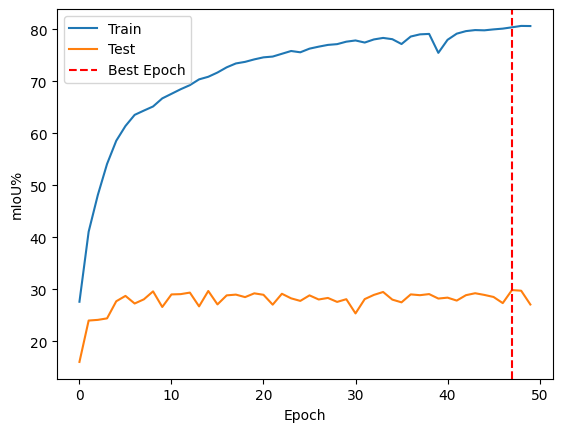

In [9]:
#Testing Data Augmentation 1 to mitigate Domain Shift problem

#Set up the model with the pretrained weights
BiSeNet_model = BiSeNet(num_classes=19, context_path='resnet18').to(device)

#Set up the loss function and the optimizer for BiSeNet
BiSeNet_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
BiSeNet_optimizer = torch.optim.SGD(BiSeNet_model.parameters(), lr=2.5e-2, momentum=0.9, weight_decay=1e-4)

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(BiSeNet_model, BiSeNet_criterion, BiSeNet_optimizer,
            gta5_train_dataloader_aug1, cityscapes_test_dataloader, class_names, device, n_epochs, model_name='BiSeNet_augment1')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch, model_name='BiSeNet_augment1')


Epoch 1/50  31s]: Train mIoU=29.34%, Test mIoU=14.72%
road: 55.90% sidewalk: 18.57% building: 58.39% wall: 2.02% fence: 0.20% pole: 6.39% traffic light: 0.00% traffic sign: 0.00% vegetation: 55.81% terrain: 6.64% sky: 43.07% person: 0.00% rider: 0.00% car: 28.64% truck: 2.06% bus: 0.00% train: 1.90% motorcycle: 0.00% bicycle: 0.00% 


Epoch 2/50  41s]: Train mIoU=42.29%, Test mIoU=14.14%
road: 9.20% sidewalk: 7.05% building: 68.78% wall: 7.57% fence: 4.01% pole: 13.87% traffic light: 3.91% traffic sign: 2.03% vegetation: 53.15% terrain: 2.85% sky: 63.56% person: 1.91% rider: 0.00% car: 19.22% truck: 10.77% bus: 0.77% train: 0.00% motorcycle: 0.07% bicycle: 0.00% 


Epoch 3/50  41s]: Train mIoU=51.07%, Test mIoU=16.79%
road: 27.33% sidewalk: 8.97% building: 60.06% wall: 9.98% fence: 15.54% pole: 12.26% traffic light: 9.17% traffic sign: 1.78% vegetation: 65.42% terrain: 7.09% sky: 57.89% person: 13.32% rider: 0.00% car: 23.97% truck: 4.48% bus: 0.82% train: 0.00% motorcycle: 0.92% bicycle: 0.00% 


Epoch 4/50  44s]: Train mIoU=56.15%, Test mIoU=16.34%
road: 24.57% sidewalk: 14.98% building: 56.49% wall: 11.09% fence: 9.30% pole: 14.33% traffic light: 7.75% traffic sign: 4.16% vegetation: 59.32% terrain: 7.86% sky: 55.98% person: 23.27% rider: 0.00% car: 17.73% truck: 2.06% bus: 0.22% train: 0.00% motorcycle: 1.41% bicycle: 0.00% 


Epoch 5/50  45s]: Train mIoU=59.00%, Test mIoU=18.49%
road: 25.07% sidewalk: 3.87% building: 70.65% wall: 8.54% fence: 4.21% pole: 15.66% traffic light: 12.57% traffic sign: 9.29% vegetation: 72.34% terrain: 7.25% sky: 61.32% person: 27.63% rider: 0.13% car: 18.61% truck: 5.78% bus: 4.36% train: 0.78% motorcycle: 3.15% bicycle: 0.00% 


Epoch 6/50  40s]: Train mIoU=62.92%, Test mIoU=18.82%
road: 21.28% sidewalk: 9.61% building: 64.77% wall: 10.00% fence: 12.60% pole: 14.05% traffic light: 14.13% traffic sign: 6.78% vegetation: 75.23% terrain: 12.86% sky: 53.41% person: 27.41% rider: 0.58% car: 17.61% truck: 7.03% bus: 3.07% train: 3.94% motorcycle: 3.19% bicycle: 0.00% 


Epoch 7/50  38s]: Train mIoU=65.21%, Test mIoU=16.23%
road: 15.13% sidewalk: 7.15% building: 52.36% wall: 6.03% fence: 3.41% pole: 12.02% traffic light: 13.80% traffic sign: 7.38% vegetation: 74.51% terrain: 10.79% sky: 49.29% person: 22.98% rider: 0.49% car: 19.40% truck: 7.00% bus: 2.75% train: 0.10% motorcycle: 3.70% bicycle: 0.00% 


Epoch 8/50  38s]: Train mIoU=66.41%, Test mIoU=19.44%
road: 26.93% sidewalk: 7.03% building: 60.31% wall: 9.25% fence: 16.36% pole: 15.49% traffic light: 16.26% traffic sign: 4.31% vegetation: 76.73% terrain: 11.18% sky: 58.30% person: 29.65% rider: 1.48% car: 20.87% truck: 5.14% bus: 3.09% train: 3.43% motorcycle: 3.61% bicycle: 0.00% 


Epoch 9/50  40s]: Train mIoU=67.51%, Test mIoU=18.37%
road: 23.58% sidewalk: 6.48% building: 62.77% wall: 7.63% fence: 9.02% pole: 15.43% traffic light: 16.38% traffic sign: 5.51% vegetation: 73.49% terrain: 9.23% sky: 62.08% person: 30.83% rider: 0.92% car: 20.28% truck: 2.65% bus: 1.94% train: 0.00% motorcycle: 0.91% bicycle: 0.00% 


Epoch 10/50  54s]: Train mIoU=68.62%, Test mIoU=20.60%
road: 36.91% sidewalk: 11.15% building: 64.84% wall: 10.11% fence: 14.42% pole: 17.41% traffic light: 16.40% traffic sign: 8.06% vegetation: 71.20% terrain: 7.07% sky: 59.42% person: 33.19% rider: 1.38% car: 26.92% truck: 4.83% bus: 1.60% train: 2.79% motorcycle: 3.64% bicycle: 0.01% 


Epoch 11/50  33s]: Train mIoU=69.43%, Test mIoU=19.13%
road: 33.41% sidewalk: 7.78% building: 61.15% wall: 6.45% fence: 7.67% pole: 12.63% traffic light: 16.36% traffic sign: 7.42% vegetation: 72.38% terrain: 7.91% sky: 63.71% person: 30.69% rider: 0.74% car: 24.42% truck: 5.62% bus: 2.30% train: 0.00% motorcycle: 2.74% bicycle: 0.02% 


Epoch 12/50  46s]: Train mIoU=70.29%, Test mIoU=20.47%
road: 37.78% sidewalk: 7.83% building: 69.29% wall: 8.51% fence: 7.97% pole: 16.45% traffic light: 18.53% traffic sign: 8.05% vegetation: 70.98% terrain: 6.01% sky: 62.48% person: 35.69% rider: 1.39% car: 25.61% truck: 5.21% bus: 3.26% train: 0.71% motorcycle: 3.10% bicycle: 0.01% 


Epoch 13/50  49s]: Train mIoU=71.13%, Test mIoU=21.31%
road: 36.62% sidewalk: 11.46% building: 67.35% wall: 8.31% fence: 8.56% pole: 16.20% traffic light: 17.52% traffic sign: 9.16% vegetation: 74.99% terrain: 8.06% sky: 63.03% person: 36.46% rider: 3.58% car: 25.55% truck: 5.43% bus: 6.47% train: 1.23% motorcycle: 4.62% bicycle: 0.25% 


Epoch 14/50  55s]: Train mIoU=72.08%, Test mIoU=21.14%
road: 37.00% sidewalk: 12.29% building: 64.25% wall: 8.79% fence: 13.31% pole: 15.42% traffic light: 18.35% traffic sign: 6.28% vegetation: 74.54% terrain: 8.40% sky: 61.28% person: 35.88% rider: 3.75% car: 25.72% truck: 6.46% bus: 3.97% train: 1.75% motorcycle: 4.04% bicycle: 0.12% 


Epoch 15/50  42s]: Train mIoU=73.24%, Test mIoU=20.74%
road: 38.35% sidewalk: 7.11% building: 65.59% wall: 8.21% fence: 10.76% pole: 14.17% traffic light: 18.20% traffic sign: 6.92% vegetation: 73.49% terrain: 6.39% sky: 63.21% person: 34.03% rider: 3.32% car: 28.31% truck: 5.12% bus: 6.41% train: 0.27% motorcycle: 3.82% bicycle: 0.47% 


Epoch 16/50  39s]: Train mIoU=74.29%, Test mIoU=22.18%
road: 43.86% sidewalk: 8.12% building: 67.30% wall: 10.97% fence: 14.77% pole: 17.77% traffic light: 18.26% traffic sign: 8.02% vegetation: 75.25% terrain: 10.19% sky: 64.84% person: 34.84% rider: 1.95% car: 25.97% truck: 8.71% bus: 5.19% train: 0.01% motorcycle: 4.76% bicycle: 0.56% 


Epoch 17/50  39s]: Train mIoU=74.54%, Test mIoU=20.86%
road: 35.78% sidewalk: 9.51% building: 64.06% wall: 9.82% fence: 13.38% pole: 16.01% traffic light: 19.19% traffic sign: 5.34% vegetation: 74.96% terrain: 8.71% sky: 62.98% person: 35.66% rider: 3.28% car: 24.38% truck: 7.43% bus: 1.22% train: 0.00% motorcycle: 3.85% bicycle: 0.69% 


Epoch 18/50  41s]: Train mIoU=75.48%, Test mIoU=19.64%
road: 34.08% sidewalk: 7.24% building: 60.37% wall: 6.96% fence: 8.32% pole: 14.86% traffic light: 14.91% traffic sign: 6.24% vegetation: 72.40% terrain: 9.71% sky: 58.43% person: 33.66% rider: 5.56% car: 23.55% truck: 6.73% bus: 4.04% train: 0.01% motorcycle: 5.47% bicycle: 0.69% 


Epoch 19/50  42s]: Train mIoU=75.83%, Test mIoU=19.71%
road: 30.71% sidewalk: 5.52% building: 62.35% wall: 7.77% fence: 8.20% pole: 14.78% traffic light: 19.05% traffic sign: 6.45% vegetation: 74.93% terrain: 7.94% sky: 59.81% person: 36.49% rider: 2.92% car: 23.09% truck: 7.22% bus: 2.41% train: 0.08% motorcycle: 3.91% bicycle: 0.80% 
Epoch 19/50  42s]: Train mIoU=75.83%, Test mIoU=19.71%
road: 30.71% sidewalk: 5.52% building: 62.35% wall: 7.77% fence: 8.20% pole: 14.78% traffic light: 19.05% traffic sign: 6.45% vegetation: 74.93% terrain: 7.94% sky: 59.81% person: 36.49% rider: 2.92% car: 23.09% truck: 7.22% bus: 2.41% train: 0.08% motorcycle: 3.91% bicycle: 0.80% 


Epoch 20/50  42s]: Train mIoU=76.05%, Test mIoU=20.28%
road: 45.43% sidewalk: 8.94% building: 63.15% wall: 6.91% fence: 5.15% pole: 15.23% traffic light: 17.20% traffic sign: 6.47% vegetation: 74.03% terrain: 8.91% sky: 58.80% person: 30.88% rider: 1.91% car: 27.65% truck: 6.93% bus: 1.53% train: 0.00% motorcycle: 4.32% bicycle: 1.94% 
Epoch 20/50  42s]: Train mIoU=76.05%, Test mIoU=20.28%
road: 45.43% sidewalk: 8.94% building: 63.15% wall: 6.91% fence: 5.15% pole: 15.23% traffic light: 17.20% traffic sign: 6.47% vegetation: 74.03% terrain: 8.91% sky: 58.80% person: 30.88% rider: 1.91% car: 27.65% truck: 6.93% bus: 1.53% train: 0.00% motorcycle: 4.32% bicycle: 1.94% 


Epoch 21/50  42s]: Train mIoU=76.54%, Test mIoU=20.46%
road: 31.86% sidewalk: 9.32% building: 66.95% wall: 8.56% fence: 11.15% pole: 15.53% traffic light: 16.68% traffic sign: 6.86% vegetation: 72.91% terrain: 6.40% sky: 63.07% person: 36.56% rider: 4.93% car: 24.07% truck: 5.21% bus: 2.63% train: 0.02% motorcycle: 4.45% bicycle: 1.50% 
Epoch 21/50  42s]: Train mIoU=76.54%, Test mIoU=20.46%
road: 31.86% sidewalk: 9.32% building: 66.95% wall: 8.56% fence: 11.15% pole: 15.53% traffic light: 16.68% traffic sign: 6.86% vegetation: 72.91% terrain: 6.40% sky: 63.07% person: 36.56% rider: 4.93% car: 24.07% truck: 5.21% bus: 2.63% train: 0.02% motorcycle: 4.45% bicycle: 1.50% 


Epoch 22/50  38s]: Train mIoU=76.99%, Test mIoU=21.00%
road: 37.21% sidewalk: 8.19% building: 66.87% wall: 9.57% fence: 10.26% pole: 14.05% traffic light: 18.09% traffic sign: 7.37% vegetation: 73.79% terrain: 7.15% sky: 64.28% person: 37.16% rider: 6.12% car: 27.03% truck: 3.72% bus: 0.71% train: 1.28% motorcycle: 4.45% bicycle: 1.79% 
Epoch 22/50  38s]: Train mIoU=76.99%, Test mIoU=21.00%
road: 37.21% sidewalk: 8.19% building: 66.87% wall: 9.57% fence: 10.26% pole: 14.05% traffic light: 18.09% traffic sign: 7.37% vegetation: 73.79% terrain: 7.15% sky: 64.28% person: 37.16% rider: 6.12% car: 27.03% truck: 3.72% bus: 0.71% train: 1.28% motorcycle: 4.45% bicycle: 1.79% 


Epoch 23/50  37s]: Train mIoU=77.35%, Test mIoU=20.87%
road: 43.18% sidewalk: 10.41% building: 65.66% wall: 6.86% fence: 5.31% pole: 15.46% traffic light: 17.65% traffic sign: 6.79% vegetation: 75.72% terrain: 8.22% sky: 61.51% person: 33.75% rider: 2.59% car: 27.41% truck: 6.16% bus: 2.43% train: 0.07% motorcycle: 4.55% bicycle: 2.85% 
Epoch 23/50  37s]: Train mIoU=77.35%, Test mIoU=20.87%
road: 43.18% sidewalk: 10.41% building: 65.66% wall: 6.86% fence: 5.31% pole: 15.46% traffic light: 17.65% traffic sign: 6.79% vegetation: 75.72% terrain: 8.22% sky: 61.51% person: 33.75% rider: 2.59% car: 27.41% truck: 6.16% bus: 2.43% train: 0.07% motorcycle: 4.55% bicycle: 2.85% 


Epoch 24/50  46s]: Train mIoU=77.73%, Test mIoU=21.30%
road: 42.50% sidewalk: 10.84% building: 64.19% wall: 11.61% fence: 13.85% pole: 13.88% traffic light: 16.26% traffic sign: 7.13% vegetation: 71.62% terrain: 10.83% sky: 64.18% person: 36.90% rider: 2.22% car: 24.49% truck: 6.31% bus: 3.07% train: 0.87% motorcycle: 2.79% bicycle: 1.25% 
Epoch 24/50  46s]: Train mIoU=77.73%, Test mIoU=21.30%
road: 42.50% sidewalk: 10.84% building: 64.19% wall: 11.61% fence: 13.85% pole: 13.88% traffic light: 16.26% traffic sign: 7.13% vegetation: 71.62% terrain: 10.83% sky: 64.18% person: 36.90% rider: 2.22% car: 24.49% truck: 6.31% bus: 3.07% train: 0.87% motorcycle: 2.79% bicycle: 1.25% 


Epoch 25/50  45s]: Train mIoU=77.95%, Test mIoU=21.37%
road: 39.02% sidewalk: 15.69% building: 63.99% wall: 7.50% fence: 11.20% pole: 15.39% traffic light: 16.43% traffic sign: 6.94% vegetation: 74.61% terrain: 9.01% sky: 63.85% person: 38.44% rider: 2.48% car: 27.26% truck: 6.01% bus: 3.24% train: 0.07% motorcycle: 3.53% bicycle: 1.30% 
Epoch 25/50  45s]: Train mIoU=77.95%, Test mIoU=21.37%
road: 39.02% sidewalk: 15.69% building: 63.99% wall: 7.50% fence: 11.20% pole: 15.39% traffic light: 16.43% traffic sign: 6.94% vegetation: 74.61% terrain: 9.01% sky: 63.85% person: 38.44% rider: 2.48% car: 27.26% truck: 6.01% bus: 3.24% train: 0.07% motorcycle: 3.53% bicycle: 1.30% 


Epoch 26/50  52s]: Train mIoU=78.07%, Test mIoU=21.80%
road: 43.74% sidewalk: 10.33% building: 68.08% wall: 9.92% fence: 10.48% pole: 17.69% traffic light: 18.34% traffic sign: 7.55% vegetation: 73.41% terrain: 8.26% sky: 65.07% person: 38.11% rider: 3.05% car: 27.12% truck: 6.52% bus: 0.83% train: 0.62% motorcycle: 4.22% bicycle: 0.88% 
Epoch 26/50  52s]: Train mIoU=78.07%, Test mIoU=21.80%
road: 43.74% sidewalk: 10.33% building: 68.08% wall: 9.92% fence: 10.48% pole: 17.69% traffic light: 18.34% traffic sign: 7.55% vegetation: 73.41% terrain: 8.26% sky: 65.07% person: 38.11% rider: 3.05% car: 27.12% truck: 6.52% bus: 0.83% train: 0.62% motorcycle: 4.22% bicycle: 0.88% 


Epoch 27/50  45s]: Train mIoU=78.31%, Test mIoU=22.55%
road: 48.37% sidewalk: 9.57% building: 65.97% wall: 11.81% fence: 10.40% pole: 17.29% traffic light: 17.32% traffic sign: 6.93% vegetation: 74.35% terrain: 7.16% sky: 64.73% person: 39.72% rider: 4.96% car: 33.48% truck: 8.58% bus: 2.31% train: 0.01% motorcycle: 4.58% bicycle: 0.91% 
Epoch 27/50  45s]: Train mIoU=78.31%, Test mIoU=22.55%
road: 48.37% sidewalk: 9.57% building: 65.97% wall: 11.81% fence: 10.40% pole: 17.29% traffic light: 17.32% traffic sign: 6.93% vegetation: 74.35% terrain: 7.16% sky: 64.73% person: 39.72% rider: 4.96% car: 33.48% truck: 8.58% bus: 2.31% train: 0.01% motorcycle: 4.58% bicycle: 0.91% 


Epoch 28/50  49s]: Train mIoU=78.66%, Test mIoU=20.88%
road: 38.02% sidewalk: 9.11% building: 65.31% wall: 8.91% fence: 8.41% pole: 16.39% traffic light: 18.07% traffic sign: 7.40% vegetation: 75.61% terrain: 8.76% sky: 62.28% person: 37.58% rider: 2.08% car: 24.62% truck: 6.00% bus: 1.83% train: 1.95% motorcycle: 3.23% bicycle: 1.26% 
Epoch 28/50  49s]: Train mIoU=78.66%, Test mIoU=20.88%
road: 38.02% sidewalk: 9.11% building: 65.31% wall: 8.91% fence: 8.41% pole: 16.39% traffic light: 18.07% traffic sign: 7.40% vegetation: 75.61% terrain: 8.76% sky: 62.28% person: 37.58% rider: 2.08% car: 24.62% truck: 6.00% bus: 1.83% train: 1.95% motorcycle: 3.23% bicycle: 1.26% 


Epoch 29/50  47s]: Train mIoU=78.88%, Test mIoU=21.51%
road: 40.59% sidewalk: 14.33% building: 66.14% wall: 8.36% fence: 11.23% pole: 15.24% traffic light: 17.26% traffic sign: 8.60% vegetation: 70.89% terrain: 6.99% sky: 64.15% person: 37.02% rider: 7.00% car: 27.74% truck: 5.89% bus: 1.19% train: 0.24% motorcycle: 4.75% bicycle: 1.10% 
Epoch 29/50  47s]: Train mIoU=78.88%, Test mIoU=21.51%
road: 40.59% sidewalk: 14.33% building: 66.14% wall: 8.36% fence: 11.23% pole: 15.24% traffic light: 17.26% traffic sign: 8.60% vegetation: 70.89% terrain: 6.99% sky: 64.15% person: 37.02% rider: 7.00% car: 27.74% truck: 5.89% bus: 1.19% train: 0.24% motorcycle: 4.75% bicycle: 1.10% 


Epoch 30/50  46s]: Train mIoU=78.88%, Test mIoU=20.97%
road: 39.87% sidewalk: 8.36% building: 62.04% wall: 9.31% fence: 8.86% pole: 16.17% traffic light: 15.81% traffic sign: 8.76% vegetation: 74.32% terrain: 7.88% sky: 62.69% person: 36.62% rider: 4.46% car: 28.34% truck: 6.34% bus: 1.67% train: 1.48% motorcycle: 5.16% bicycle: 0.35% 
Epoch 30/50  46s]: Train mIoU=78.88%, Test mIoU=20.97%
road: 39.87% sidewalk: 8.36% building: 62.04% wall: 9.31% fence: 8.86% pole: 16.17% traffic light: 15.81% traffic sign: 8.76% vegetation: 74.32% terrain: 7.88% sky: 62.69% person: 36.62% rider: 4.46% car: 28.34% truck: 6.34% bus: 1.67% train: 1.48% motorcycle: 5.16% bicycle: 0.35% 


Epoch 31/50  47s]: Train mIoU=79.08%, Test mIoU=21.50%
road: 35.92% sidewalk: 10.78% building: 67.60% wall: 9.40% fence: 13.93% pole: 18.89% traffic light: 15.69% traffic sign: 9.68% vegetation: 73.17% terrain: 7.70% sky: 62.76% person: 38.75% rider: 4.54% car: 23.72% truck: 7.63% bus: 2.16% train: 0.92% motorcycle: 4.48% bicycle: 0.70% 
Epoch 31/50  47s]: Train mIoU=79.08%, Test mIoU=21.50%
road: 35.92% sidewalk: 10.78% building: 67.60% wall: 9.40% fence: 13.93% pole: 18.89% traffic light: 15.69% traffic sign: 9.68% vegetation: 73.17% terrain: 7.70% sky: 62.76% person: 38.75% rider: 4.54% car: 23.72% truck: 7.63% bus: 2.16% train: 0.92% motorcycle: 4.48% bicycle: 0.70% 


Epoch 32/50  49s]: Train mIoU=79.48%, Test mIoU=21.50%
road: 41.44% sidewalk: 9.49% building: 59.77% wall: 10.65% fence: 8.15% pole: 14.83% traffic light: 16.92% traffic sign: 7.72% vegetation: 73.74% terrain: 10.43% sky: 65.06% person: 38.79% rider: 3.55% car: 27.36% truck: 9.43% bus: 6.70% train: 0.65% motorcycle: 3.17% bicycle: 0.72% 
Epoch 32/50  49s]: Train mIoU=79.48%, Test mIoU=21.50%
road: 41.44% sidewalk: 9.49% building: 59.77% wall: 10.65% fence: 8.15% pole: 14.83% traffic light: 16.92% traffic sign: 7.72% vegetation: 73.74% terrain: 10.43% sky: 65.06% person: 38.79% rider: 3.55% car: 27.36% truck: 9.43% bus: 6.70% train: 0.65% motorcycle: 3.17% bicycle: 0.72% 


Epoch 33/50  45s]: Train mIoU=79.43%, Test mIoU=20.84%
road: 39.31% sidewalk: 12.01% building: 57.52% wall: 10.16% fence: 8.14% pole: 14.20% traffic light: 15.86% traffic sign: 5.88% vegetation: 73.87% terrain: 7.34% sky: 66.46% person: 31.98% rider: 3.74% car: 31.89% truck: 7.05% bus: 2.63% train: 1.68% motorcycle: 4.16% bicycle: 2.13% 
Epoch 33/50  45s]: Train mIoU=79.43%, Test mIoU=20.84%
road: 39.31% sidewalk: 12.01% building: 57.52% wall: 10.16% fence: 8.14% pole: 14.20% traffic light: 15.86% traffic sign: 5.88% vegetation: 73.87% terrain: 7.34% sky: 66.46% person: 31.98% rider: 3.74% car: 31.89% truck: 7.05% bus: 2.63% train: 1.68% motorcycle: 4.16% bicycle: 2.13% 


Epoch 34/50  48s]: Train mIoU=79.56%, Test mIoU=21.93%
road: 45.65% sidewalk: 12.19% building: 63.39% wall: 10.84% fence: 11.49% pole: 14.25% traffic light: 16.27% traffic sign: 8.42% vegetation: 73.07% terrain: 6.59% sky: 60.48% person: 38.62% rider: 3.82% car: 32.35% truck: 9.76% bus: 3.31% train: 1.55% motorcycle: 3.94% bicycle: 0.76% 
Epoch 34/50  48s]: Train mIoU=79.56%, Test mIoU=21.93%
road: 45.65% sidewalk: 12.19% building: 63.39% wall: 10.84% fence: 11.49% pole: 14.25% traffic light: 16.27% traffic sign: 8.42% vegetation: 73.07% terrain: 6.59% sky: 60.48% person: 38.62% rider: 3.82% car: 32.35% truck: 9.76% bus: 3.31% train: 1.55% motorcycle: 3.94% bicycle: 0.76% 


Epoch 35/50  44s]: Train mIoU=79.86%, Test mIoU=20.67%
road: 39.80% sidewalk: 8.58% building: 58.65% wall: 8.32% fence: 10.32% pole: 14.27% traffic light: 17.22% traffic sign: 6.91% vegetation: 72.25% terrain: 8.15% sky: 63.77% person: 35.16% rider: 3.76% car: 27.96% truck: 7.82% bus: 2.68% train: 1.70% motorcycle: 3.71% bicycle: 1.64% 
Epoch 35/50  44s]: Train mIoU=79.86%, Test mIoU=20.67%
road: 39.80% sidewalk: 8.58% building: 58.65% wall: 8.32% fence: 10.32% pole: 14.27% traffic light: 17.22% traffic sign: 6.91% vegetation: 72.25% terrain: 8.15% sky: 63.77% person: 35.16% rider: 3.76% car: 27.96% truck: 7.82% bus: 2.68% train: 1.70% motorcycle: 3.71% bicycle: 1.64% 


Epoch 36/50  44s]: Train mIoU=80.06%, Test mIoU=22.14%
road: 40.59% sidewalk: 14.84% building: 71.21% wall: 9.16% fence: 10.00% pole: 17.74% traffic light: 19.38% traffic sign: 8.13% vegetation: 75.16% terrain: 6.42% sky: 65.66% person: 38.89% rider: 6.45% car: 25.72% truck: 4.37% bus: 0.33% train: 2.00% motorcycle: 3.44% bicycle: 1.23% 
Epoch 36/50  44s]: Train mIoU=80.06%, Test mIoU=22.14%
road: 40.59% sidewalk: 14.84% building: 71.21% wall: 9.16% fence: 10.00% pole: 17.74% traffic light: 19.38% traffic sign: 8.13% vegetation: 75.16% terrain: 6.42% sky: 65.66% person: 38.89% rider: 6.45% car: 25.72% truck: 4.37% bus: 0.33% train: 2.00% motorcycle: 3.44% bicycle: 1.23% 


Epoch 37/50  42s]: Train mIoU=79.99%, Test mIoU=22.83%
road: 45.07% sidewalk: 11.83% building: 68.42% wall: 11.87% fence: 13.16% pole: 17.80% traffic light: 18.64% traffic sign: 8.44% vegetation: 74.96% terrain: 6.41% sky: 67.73% person: 37.93% rider: 3.17% car: 31.01% truck: 6.24% bus: 4.45% train: 0.94% motorcycle: 4.35% bicycle: 1.35% 
Epoch 37/50  42s]: Train mIoU=79.99%, Test mIoU=22.83%
road: 45.07% sidewalk: 11.83% building: 68.42% wall: 11.87% fence: 13.16% pole: 17.80% traffic light: 18.64% traffic sign: 8.44% vegetation: 74.96% terrain: 6.41% sky: 67.73% person: 37.93% rider: 3.17% car: 31.01% truck: 6.24% bus: 4.45% train: 0.94% motorcycle: 4.35% bicycle: 1.35% 


Epoch 38/50  53s]: Train mIoU=80.02%, Test mIoU=23.24%
road: 49.37% sidewalk: 14.33% building: 68.58% wall: 10.58% fence: 12.11% pole: 15.21% traffic light: 17.86% traffic sign: 6.91% vegetation: 72.79% terrain: 6.06% sky: 68.20% person: 40.26% rider: 6.15% car: 36.66% truck: 6.97% bus: 2.36% train: 1.10% motorcycle: 5.01% bicycle: 1.09% 
Epoch 38/50  53s]: Train mIoU=80.02%, Test mIoU=23.24%
road: 49.37% sidewalk: 14.33% building: 68.58% wall: 10.58% fence: 12.11% pole: 15.21% traffic light: 17.86% traffic sign: 6.91% vegetation: 72.79% terrain: 6.06% sky: 68.20% person: 40.26% rider: 6.15% car: 36.66% truck: 6.97% bus: 2.36% train: 1.10% motorcycle: 5.01% bicycle: 1.09% 


Epoch 39/50  45s]: Train mIoU=79.33%, Test mIoU=22.42%
road: 41.89% sidewalk: 13.71% building: 67.66% wall: 10.83% fence: 10.24% pole: 17.13% traffic light: 19.62% traffic sign: 7.45% vegetation: 75.66% terrain: 7.09% sky: 66.50% person: 36.80% rider: 7.34% car: 28.17% truck: 6.92% bus: 1.77% train: 0.72% motorcycle: 4.69% bicycle: 1.86% 
Epoch 39/50  45s]: Train mIoU=79.33%, Test mIoU=22.42%
road: 41.89% sidewalk: 13.71% building: 67.66% wall: 10.83% fence: 10.24% pole: 17.13% traffic light: 19.62% traffic sign: 7.45% vegetation: 75.66% terrain: 7.09% sky: 66.50% person: 36.80% rider: 7.34% car: 28.17% truck: 6.92% bus: 1.77% train: 0.72% motorcycle: 4.69% bicycle: 1.86% 


Epoch 40/50  56s]: Train mIoU=80.36%, Test mIoU=21.55%
road: 40.98% sidewalk: 12.76% building: 65.69% wall: 9.29% fence: 9.82% pole: 13.89% traffic light: 14.95% traffic sign: 7.66% vegetation: 72.18% terrain: 5.33% sky: 65.74% person: 37.92% rider: 3.41% car: 31.70% truck: 7.82% bus: 2.01% train: 3.48% motorcycle: 3.65% bicycle: 1.19% 
Epoch 40/50  56s]: Train mIoU=80.36%, Test mIoU=21.55%
road: 40.98% sidewalk: 12.76% building: 65.69% wall: 9.29% fence: 9.82% pole: 13.89% traffic light: 14.95% traffic sign: 7.66% vegetation: 72.18% terrain: 5.33% sky: 65.74% person: 37.92% rider: 3.41% car: 31.70% truck: 7.82% bus: 2.01% train: 3.48% motorcycle: 3.65% bicycle: 1.19% 


Epoch 41/50  43s]: Train mIoU=80.68%, Test mIoU=22.93%
road: 48.98% sidewalk: 9.68% building: 69.16% wall: 11.38% fence: 12.07% pole: 19.15% traffic light: 18.48% traffic sign: 8.78% vegetation: 73.62% terrain: 6.63% sky: 65.62% person: 38.26% rider: 8.14% car: 33.42% truck: 5.36% bus: 0.81% train: 1.17% motorcycle: 3.42% bicycle: 1.51% 
Epoch 41/50  43s]: Train mIoU=80.68%, Test mIoU=22.93%
road: 48.98% sidewalk: 9.68% building: 69.16% wall: 11.38% fence: 12.07% pole: 19.15% traffic light: 18.48% traffic sign: 8.78% vegetation: 73.62% terrain: 6.63% sky: 65.62% person: 38.26% rider: 8.14% car: 33.42% truck: 5.36% bus: 0.81% train: 1.17% motorcycle: 3.42% bicycle: 1.51% 


Epoch 42/50  46s]: Train mIoU=80.81%, Test mIoU=22.89%
road: 44.14% sidewalk: 13.40% building: 65.70% wall: 10.20% fence: 9.86% pole: 18.18% traffic light: 18.10% traffic sign: 7.69% vegetation: 74.71% terrain: 6.19% sky: 66.93% person: 38.91% rider: 4.66% car: 34.20% truck: 6.88% bus: 6.71% train: 1.91% motorcycle: 4.11% bicycle: 2.44% 
Epoch 42/50  46s]: Train mIoU=80.81%, Test mIoU=22.89%
road: 44.14% sidewalk: 13.40% building: 65.70% wall: 10.20% fence: 9.86% pole: 18.18% traffic light: 18.10% traffic sign: 7.69% vegetation: 74.71% terrain: 6.19% sky: 66.93% person: 38.91% rider: 4.66% car: 34.20% truck: 6.88% bus: 6.71% train: 1.91% motorcycle: 4.11% bicycle: 2.44% 


Epoch 43/50  42s]: Train mIoU=80.55%, Test mIoU=22.47%
road: 45.99% sidewalk: 9.80% building: 67.06% wall: 11.03% fence: 10.43% pole: 16.46% traffic light: 17.46% traffic sign: 6.90% vegetation: 73.31% terrain: 5.73% sky: 67.51% person: 37.71% rider: 7.08% car: 33.77% truck: 8.29% bus: 2.61% train: 0.19% motorcycle: 3.99% bicycle: 1.60% 
Epoch 43/50  42s]: Train mIoU=80.55%, Test mIoU=22.47%
road: 45.99% sidewalk: 9.80% building: 67.06% wall: 11.03% fence: 10.43% pole: 16.46% traffic light: 17.46% traffic sign: 6.90% vegetation: 73.31% terrain: 5.73% sky: 67.51% person: 37.71% rider: 7.08% car: 33.77% truck: 8.29% bus: 2.61% train: 0.19% motorcycle: 3.99% bicycle: 1.60% 


Epoch 44/50  45s]: Train mIoU=80.85%, Test mIoU=22.46%
road: 46.05% sidewalk: 12.81% building: 66.09% wall: 12.45% fence: 11.05% pole: 14.88% traffic light: 18.24% traffic sign: 6.46% vegetation: 73.17% terrain: 6.25% sky: 68.63% person: 38.18% rider: 2.53% car: 32.40% truck: 6.69% bus: 2.17% train: 4.14% motorcycle: 3.38% bicycle: 1.16% 
Epoch 44/50  45s]: Train mIoU=80.85%, Test mIoU=22.46%
road: 46.05% sidewalk: 12.81% building: 66.09% wall: 12.45% fence: 11.05% pole: 14.88% traffic light: 18.24% traffic sign: 6.46% vegetation: 73.17% terrain: 6.25% sky: 68.63% person: 38.18% rider: 2.53% car: 32.40% truck: 6.69% bus: 2.17% train: 4.14% motorcycle: 3.38% bicycle: 1.16% 


Epoch 45/50  45s]: Train mIoU=81.06%, Test mIoU=22.06%
road: 44.35% sidewalk: 8.47% building: 69.65% wall: 10.67% fence: 13.45% pole: 18.02% traffic light: 17.75% traffic sign: 7.35% vegetation: 70.22% terrain: 6.00% sky: 65.23% person: 39.09% rider: 4.59% car: 30.02% truck: 6.83% bus: 1.57% train: 0.83% motorcycle: 4.03% bicycle: 1.00% 
Epoch 45/50  45s]: Train mIoU=81.06%, Test mIoU=22.06%
road: 44.35% sidewalk: 8.47% building: 69.65% wall: 10.67% fence: 13.45% pole: 18.02% traffic light: 17.75% traffic sign: 7.35% vegetation: 70.22% terrain: 6.00% sky: 65.23% person: 39.09% rider: 4.59% car: 30.02% truck: 6.83% bus: 1.57% train: 0.83% motorcycle: 4.03% bicycle: 1.00% 


Epoch 46/50  42s]: Train mIoU=80.77%, Test mIoU=23.84%
road: 52.95% sidewalk: 14.78% building: 65.90% wall: 12.66% fence: 12.86% pole: 18.69% traffic light: 19.12% traffic sign: 7.85% vegetation: 73.86% terrain: 7.65% sky: 69.48% person: 38.17% rider: 4.99% car: 37.44% truck: 6.29% bus: 3.09% train: 1.68% motorcycle: 3.92% bicycle: 1.64% 
Epoch 46/50  42s]: Train mIoU=80.77%, Test mIoU=23.84%
road: 52.95% sidewalk: 14.78% building: 65.90% wall: 12.66% fence: 12.86% pole: 18.69% traffic light: 19.12% traffic sign: 7.85% vegetation: 73.86% terrain: 7.65% sky: 69.48% person: 38.17% rider: 4.99% car: 37.44% truck: 6.29% bus: 3.09% train: 1.68% motorcycle: 3.92% bicycle: 1.64% 


Epoch 47/50  44s]: Train mIoU=80.96%, Test mIoU=23.62%
road: 55.84% sidewalk: 12.10% building: 70.15% wall: 11.85% fence: 11.26% pole: 17.59% traffic light: 17.52% traffic sign: 6.87% vegetation: 75.35% terrain: 9.34% sky: 67.27% person: 39.19% rider: 6.09% car: 32.10% truck: 6.60% bus: 2.68% train: 1.72% motorcycle: 3.81% bicycle: 1.52% 
Epoch 47/50  44s]: Train mIoU=80.96%, Test mIoU=23.62%
road: 55.84% sidewalk: 12.10% building: 70.15% wall: 11.85% fence: 11.26% pole: 17.59% traffic light: 17.52% traffic sign: 6.87% vegetation: 75.35% terrain: 9.34% sky: 67.27% person: 39.19% rider: 6.09% car: 32.10% truck: 6.60% bus: 2.68% train: 1.72% motorcycle: 3.81% bicycle: 1.52% 


Epoch 48/50  38s]: Train mIoU=81.27%, Test mIoU=23.77%
road: 55.08% sidewalk: 16.59% building: 62.70% wall: 10.24% fence: 9.04% pole: 15.02% traffic light: 17.77% traffic sign: 8.98% vegetation: 73.86% terrain: 8.68% sky: 65.57% person: 39.53% rider: 4.61% car: 44.23% truck: 6.51% bus: 5.02% train: 2.40% motorcycle: 4.00% bicycle: 1.83% 
Epoch 48/50  38s]: Train mIoU=81.27%, Test mIoU=23.77%
road: 55.08% sidewalk: 16.59% building: 62.70% wall: 10.24% fence: 9.04% pole: 15.02% traffic light: 17.77% traffic sign: 8.98% vegetation: 73.86% terrain: 8.68% sky: 65.57% person: 39.53% rider: 4.61% car: 44.23% truck: 6.51% bus: 5.02% train: 2.40% motorcycle: 4.00% bicycle: 1.83% 


Epoch 49/50  42s]: Train mIoU=81.55%, Test mIoU=23.05%
road: 48.12% sidewalk: 14.22% building: 65.90% wall: 10.62% fence: 11.98% pole: 16.02% traffic light: 17.28% traffic sign: 7.27% vegetation: 73.39% terrain: 7.11% sky: 67.97% person: 40.26% rider: 5.40% car: 36.85% truck: 5.04% bus: 4.68% train: 0.39% motorcycle: 4.21% bicycle: 1.29% 
Epoch 49/50  42s]: Train mIoU=81.55%, Test mIoU=23.05%
road: 48.12% sidewalk: 14.22% building: 65.90% wall: 10.62% fence: 11.98% pole: 16.02% traffic light: 17.28% traffic sign: 7.27% vegetation: 73.39% terrain: 7.11% sky: 67.97% person: 40.26% rider: 5.40% car: 36.85% truck: 5.04% bus: 4.68% train: 0.39% motorcycle: 4.21% bicycle: 1.29% 


Epoch 50/50  45s]: Train mIoU=81.66%, Test mIoU=23.71%
road: 54.23% sidewalk: 11.90% building: 67.91% wall: 13.30% fence: 11.52% pole: 17.92% traffic light: 17.06% traffic sign: 8.37% vegetation: 73.31% terrain: 7.04% sky: 65.84% person: 40.14% rider: 6.69% car: 37.95% truck: 8.63% bus: 1.46% train: 2.10% motorcycle: 4.07% bicycle: 1.00% 
Best mIoU=23.84% at epoch 46
road: 52.95% sidewalk: 14.78% building: 65.90% wall: 12.66% fence: 12.86% pole: 18.69% traffic light: 19.12% traffic sign: 7.85% vegetation: 73.86% terrain: 7.65% sky: 69.48% person: 38.17% rider: 4.99% car: 37.44% truck: 6.29% bus: 3.09% train: 1.68% motorcycle: 3.92% bicycle: 1.64% 
Epoch 50/50  45s]: Train mIoU=81.66%, Test mIoU=23.71%
road: 54.23% sidewalk: 11.90% building: 67.91% wall: 13.30% fence: 11.52% pole: 17.92% traffic light: 17.06% traffic sign: 8.37% vegetation: 73.31% terrain: 7.04% sky: 65.84% person: 40.14% rider: 6.69% car: 37.95% truck: 8.63% bus: 1.46% train: 2.10% motorcycle: 4.07% bicycle: 1.00% 
Be

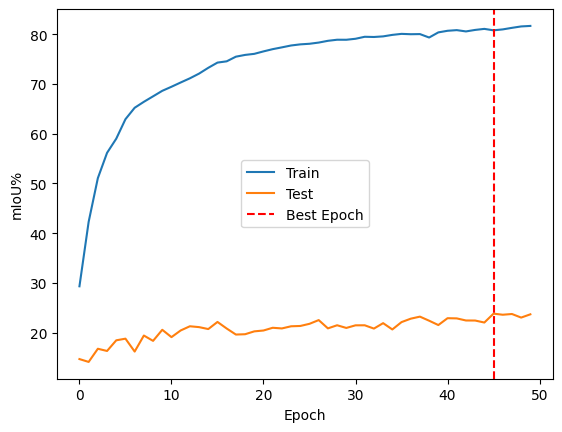

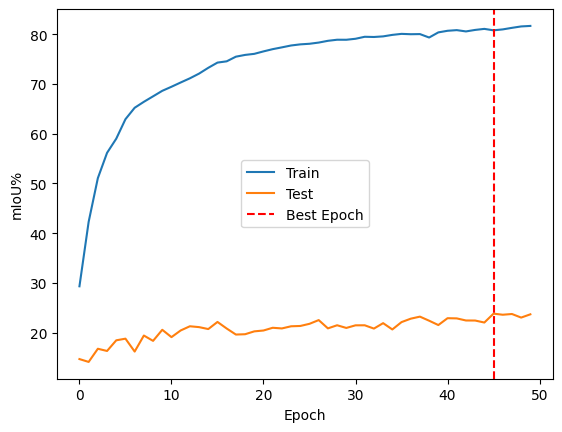

In [10]:
#Testing Data Augmentation 2 to mitigate Domain Shift problem

#Set up the model with the pretrained weights
BiSeNet_model = BiSeNet(num_classes=19, context_path='resnet18').to(device)

#Set up the loss function and the optimizer for BiSeNet
BiSeNet_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
BiSeNet_optimizer = torch.optim.SGD(BiSeNet_model.parameters(), lr=2.5e-2, momentum=0.9, weight_decay=1e-4)

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(BiSeNet_model, BiSeNet_criterion, BiSeNet_optimizer,
            gta5_train_dataloader_aug2, cityscapes_test_dataloader, class_names, device, n_epochs, model_name='BiSeNet_augment2')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch, model_name='BiSeNet_augment2')